# Customer Segmentation

### Reading Data

In [154]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as silhouette_score
import matplotlib as mpl

customer_metrics = pd.read_csv('../data/processed/customer_metrics_non_outliers.csv')

In [155]:
customer_metrics.head()

,CustomerID,TotalSpent,OrderCount,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,PurchaseFrequency
0,12348.0,1437.24,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,74,0.43
1,12349.0,1457.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,1,18,30.00
2,12350.0,294.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,1,309,30.00
3,12352.0,1385.74,7,2011-02-16 12:33:00,2011-11-03 14:37:00,260,35,0.81
4,12353.0,89.00,1,2011-05-19 17:47:00,2011-05-19 17:47:00,1,203,30.00


### Scaling Features

In [156]:
segmentation_features = ['TotalSpent', 'PurchaseFrequency', 'Recency']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_metrics[segmentation_features]) # numpy array with standard deviation

scaled_features_df = pd.DataFrame(scaled_features, index=customer_metrics.index, \
                                  columns=('TotalSpent', 'PurchaseFrequency', 'Recency'))


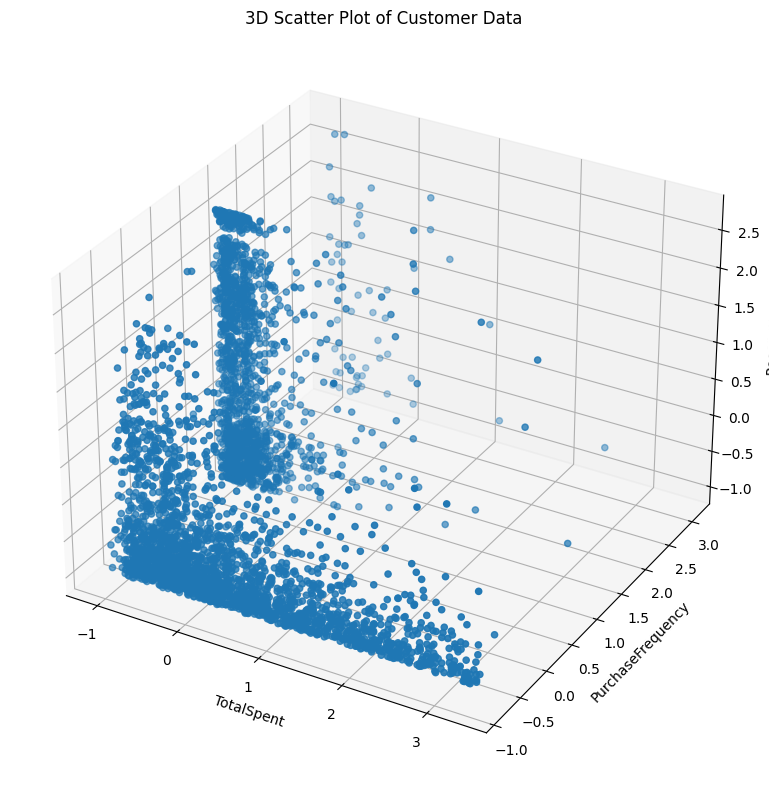

In [157]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(
  scaled_features_df['TotalSpent'],
  scaled_features_df['PurchaseFrequency'],
  scaled_features_df['Recency']
)
ax.set_xlabel('TotalSpent')
ax.set_ylabel('PurchaseFrequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

### Finding out Optimal Clusters

In [158]:
inertias = []
silhouette_scores = [] #-1 - 1 score to determine cluster overlapping
k_values = range(2, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
  cluster_labels = kmeans.fit_predict(scaled_features_df)
  sil_score = silhouette_score.silhouette_score(scaled_features_df, cluster_labels)
  silhouette_scores.append(sil_score)
  inertias.append(kmeans.inertia_)

scaled_features_df

c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

,TotalSpent,PurchaseFrequency,Recency
0,0.689197,-0.832819,-0.246058
1,0.714106,1.117995,-0.796479
2,-0.712457,1.117995,2.063743
3,0.626034,-0.807749,-0.629387
4,-0.964373,1.117995,1.021875
...,...,...,...
3899,-0.852029,1.117995,1.749217
3900,-0.974406,1.117995,0.795810
3901,-0.855156,-0.827541,-0.904598
3902,1.488472,-0.766186,-0.943913


In [160]:
silhouette_scores

[0.47543011610239333,
 0.45699082571515054,
 0.5142569699254053,
 0.5242880706803535,
 0.4966683247358951,
 0.46271177519499757,
 0.4739775703669152,
 0.438300944383873,
 0.43349681087204417]

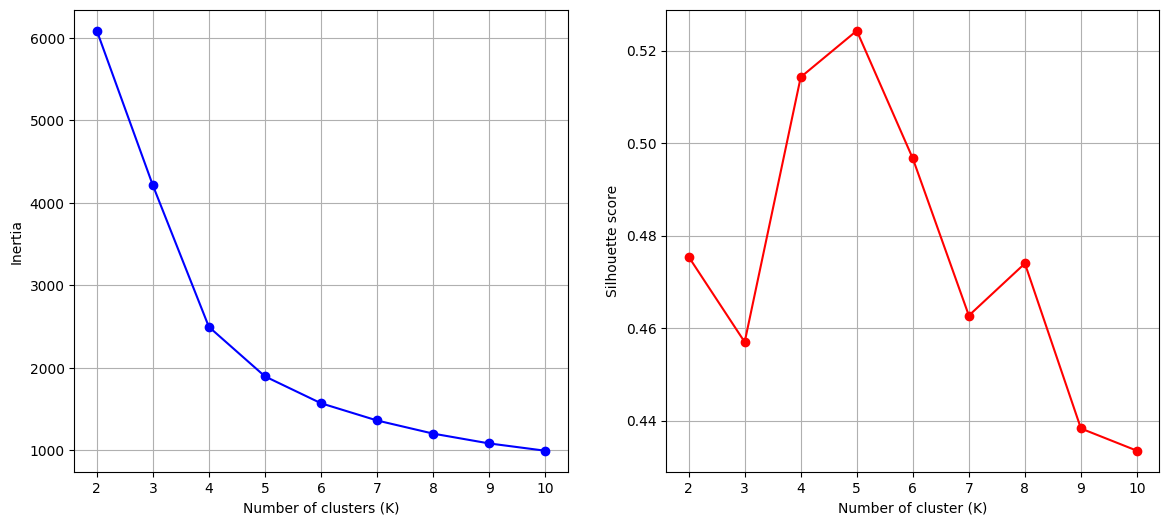

In [161]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Number of cluster (K)')
plt.ylabel('Silhouette score')
plt.grid(True)


plt.show()

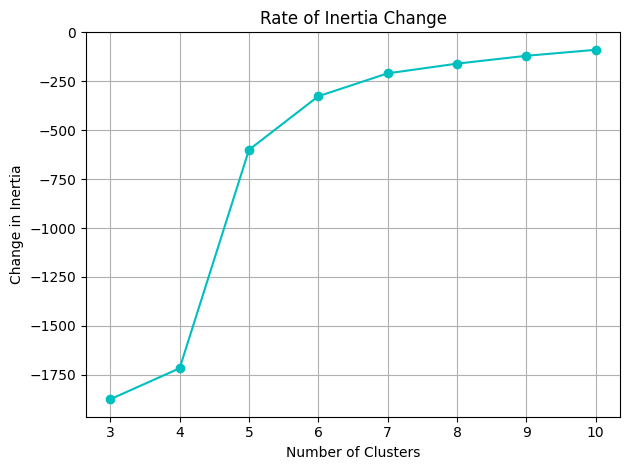

In [162]:
inertia_changes = np.diff(inertias)
plt.plot(k_values[1:], inertia_changes, 'co-')
plt.xlabel('Number of Clusters')
plt.ylabel('Change in Inertia')
plt.title('Rate of Inertia Change')
plt.tight_layout()
plt.grid(True)
plt.show()

### Segmenting Customers

In [163]:
kmeans = KMeans(n_clusters=4, random_state=42) #ideally 5 but for our usecase and simplicity we'll go with 4 clusters
customer_metrics['Segment'] = kmeans.fit_predict(scaled_features)

c:\Users\ychow\anaconda3\envs\journeyenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [164]:
segment_analysis = customer_metrics.groupby('Segment').agg(
  AvgTotalSpent= ('TotalSpent','mean'),
  TotalSpentCount= ('TotalSpent', 'count'),
  AvgPurchaseFrequency= ('PurchaseFrequency', 'mean'),
  AvgCustomerLifespan= ('CustomerLifespan', 'mean')
).round(2)

In [165]:
segment_analysis

,AvgTotalSpent,TotalSpentCount,AvgPurchaseFrequency,AvgCustomerLifespan
Segment,,,,
0,360.38,872,31.11,1.02
1,332.74,752,28.40,5.26
2,2377.40,673,1.26,241.04
3,779.54,1607,1.02,169.69


### Adding Segment Labels

In [166]:
def label_segments(row):
  if row['AvgTotalSpent'] > 1800 and row['AvgPurchaseFrequency'] < 3:
    return('HighValueIrregular')
  elif row['AvgTotalSpent'] > 500 and row['AvgPurchaseFrequency'] < 3:
    return('HighSpendingIrregular')
  elif row['AvgPurchaseFrequency'] > 30 and row['AvgCustomerLifespan'] < 3:
    return('BudgetRegular')
  elif row['AvgPurchaseFrequency'] < 30 and row['AvgCustomerLifespan'] > 3:
    return('BudgetIrregular')
  else:
    return('Oulier')

segment_analysis['SegmentLabel'] = segment_analysis.apply(label_segments, axis=1)

In [167]:
segment_analysis

,AvgTotalSpent,TotalSpentCount,AvgPurchaseFrequency,AvgCustomerLifespan,SegmentLabel
Segment,,,,,
0,360.38,872,31.11,1.02,BudgetRegular
1,332.74,752,28.40,5.26,BudgetIrregular
2,2377.40,673,1.26,241.04,HighValueIrregular
3,779.54,1607,1.02,169.69,HighSpendingIrregular


### Visualizing Segments

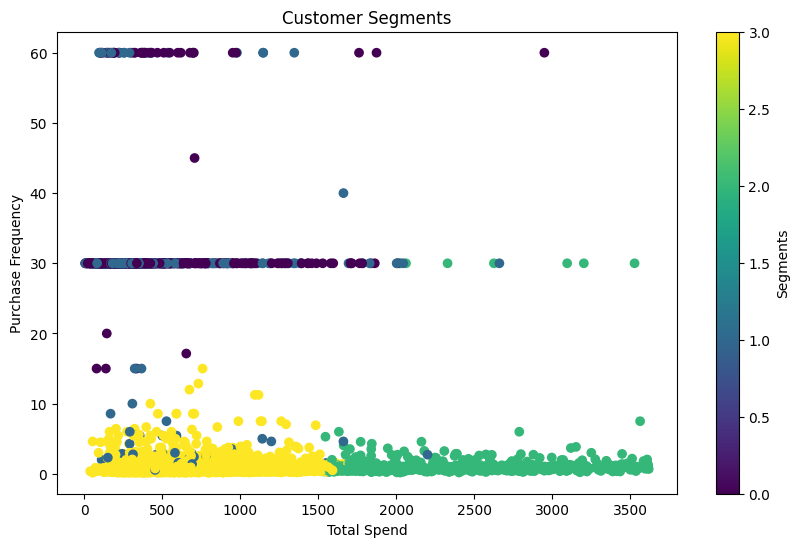

In [168]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(customer_metrics['TotalSpent'],
                      customer_metrics['PurchaseFrequency'],
                      c=customer_metrics['Segment'],
                      )
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segments')
plt.colorbar(label='Segments')

plt.show()

### Exporting Data

In [169]:
segment_analysis.to_csv('../data/processed/customer_segments.csv')